In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
# Load the data
df = pd.read_csv('SBUX(2).csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Calculate volatility
df['Volatility'] = df['Returns'].rolling(window=21).std() * np.sqrt(252)

# Calculate cumulative returns
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    wealth_index = (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return drawdowns

# Calculate drawdowns
df['Drawdowns'] = calculate_drawdowns(df['Returns'])

# Calculate max drawdown
max_drawdown = df['Drawdowns'].min()

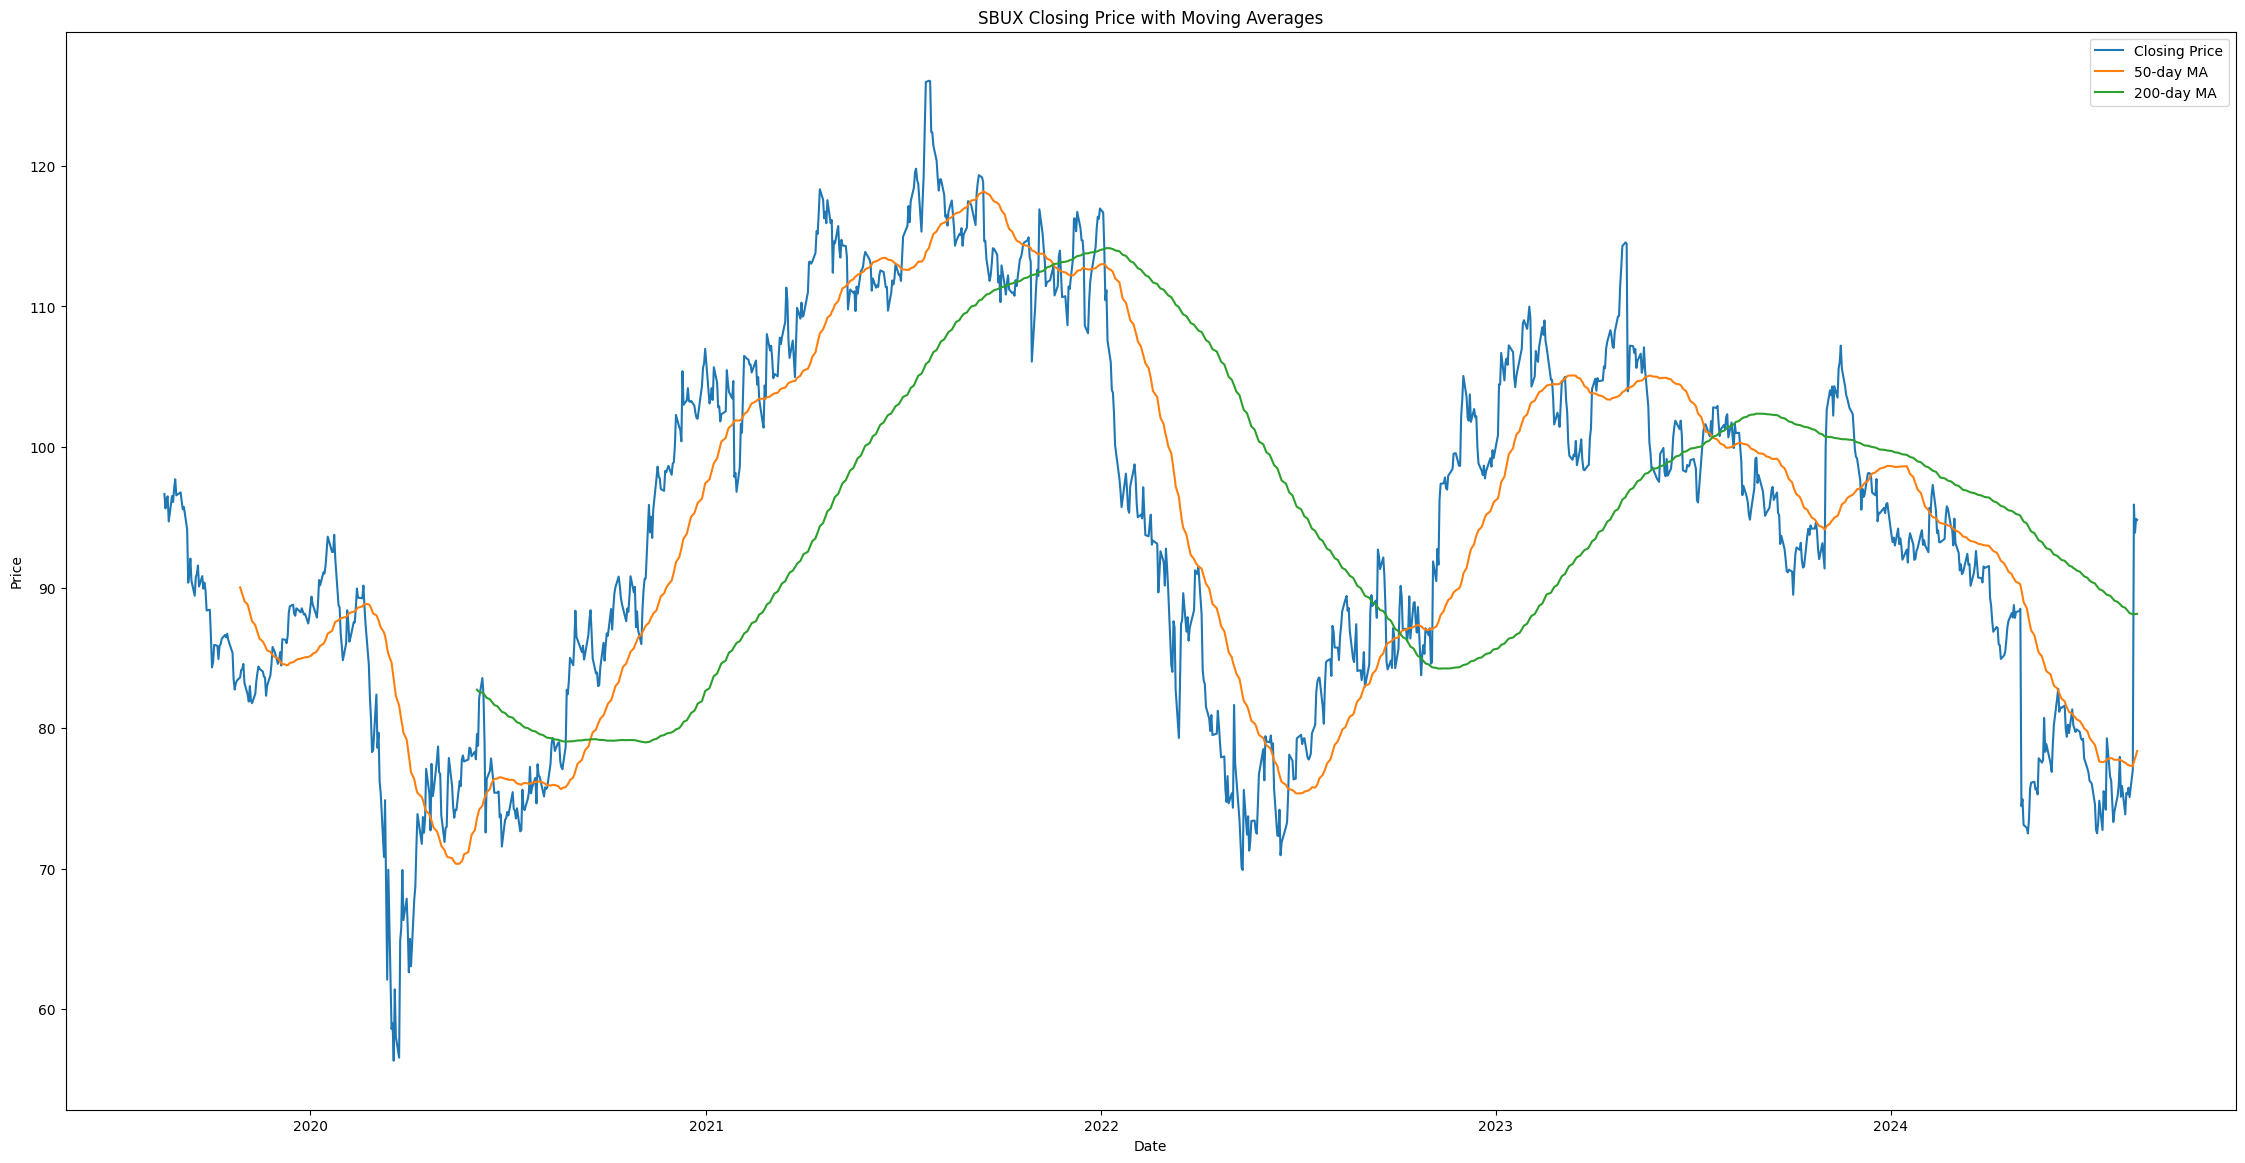

In [11]:
plt.figure(figsize=(28, 14))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.plot(df.index, df['MA50'], label='50-day MA')
plt.plot(df.index, df['MA200'], label='200-day MA')
plt.title('SBUX Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

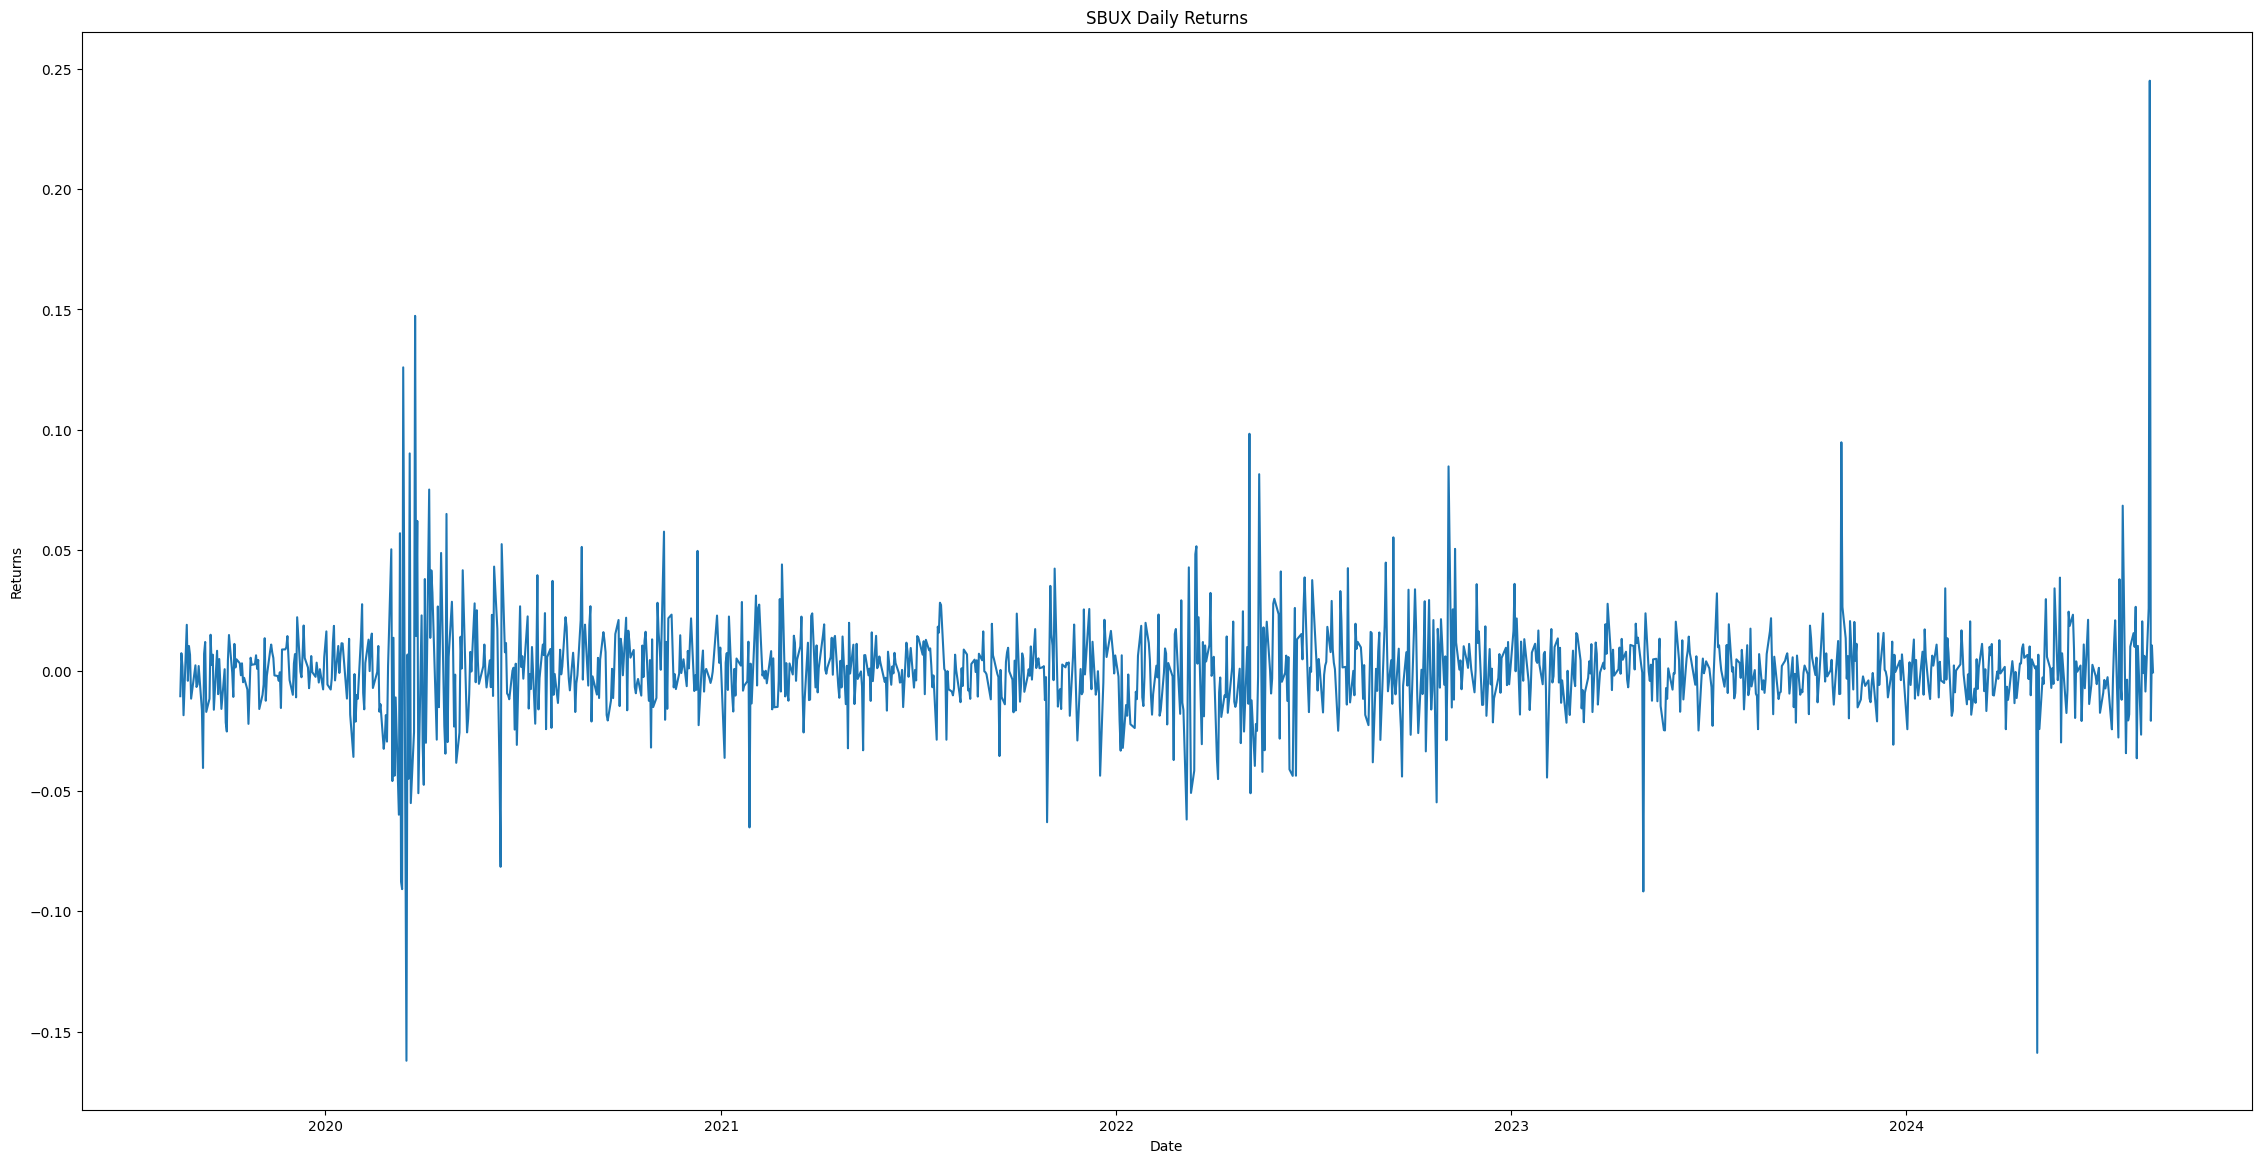

In [12]:
plt.figure(figsize=(28, 14))
plt.plot(df.index, df['Returns'])
plt.title('SBUX Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

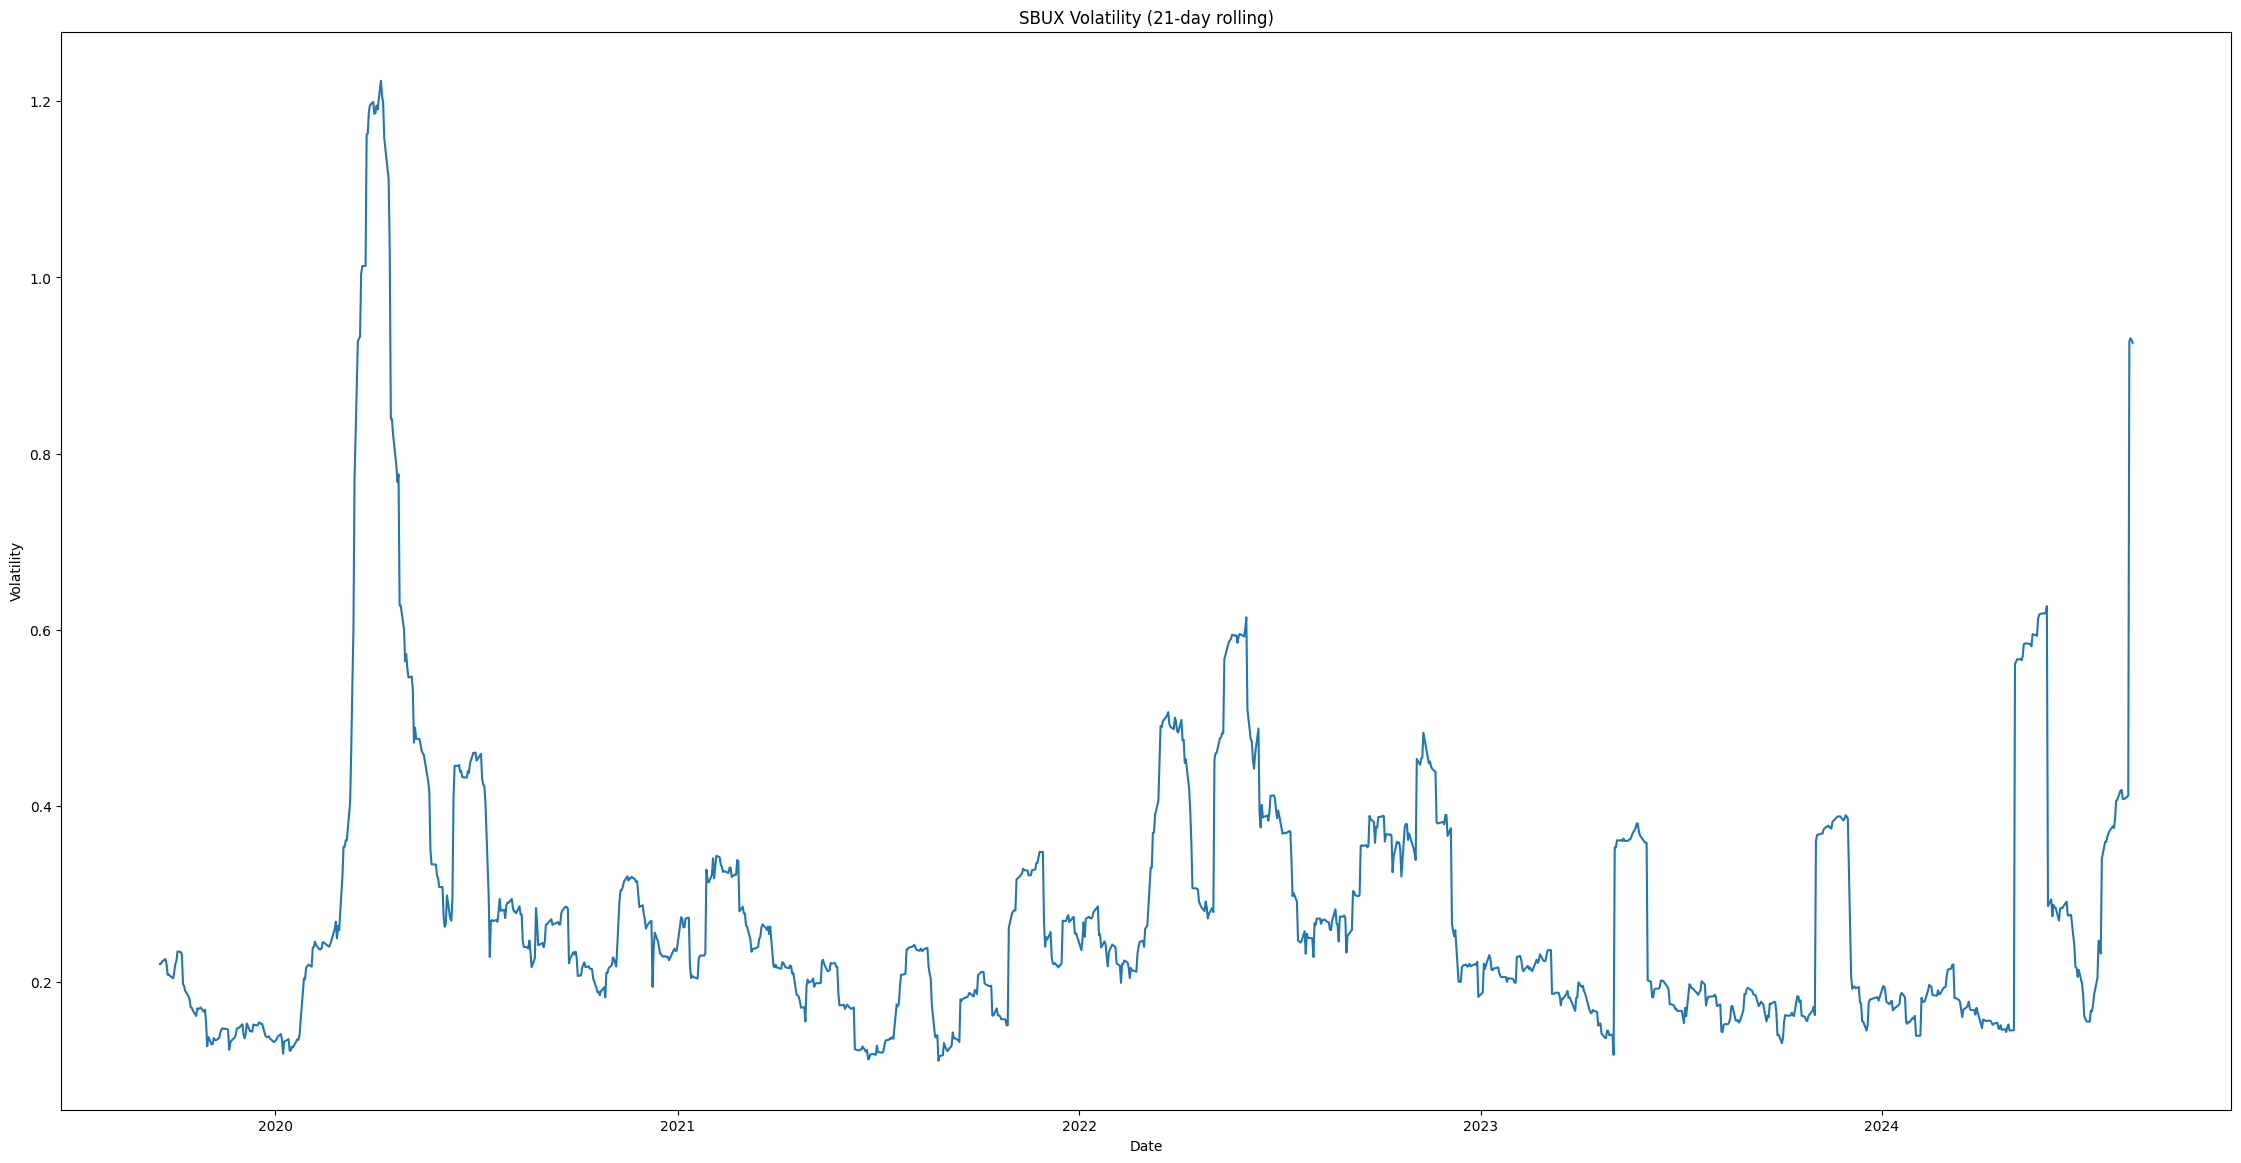

In [13]:
plt.figure(figsize=(28, 14))
plt.plot(df.index, df['Volatility'])
plt.title('SBUX Volatility (21-day rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

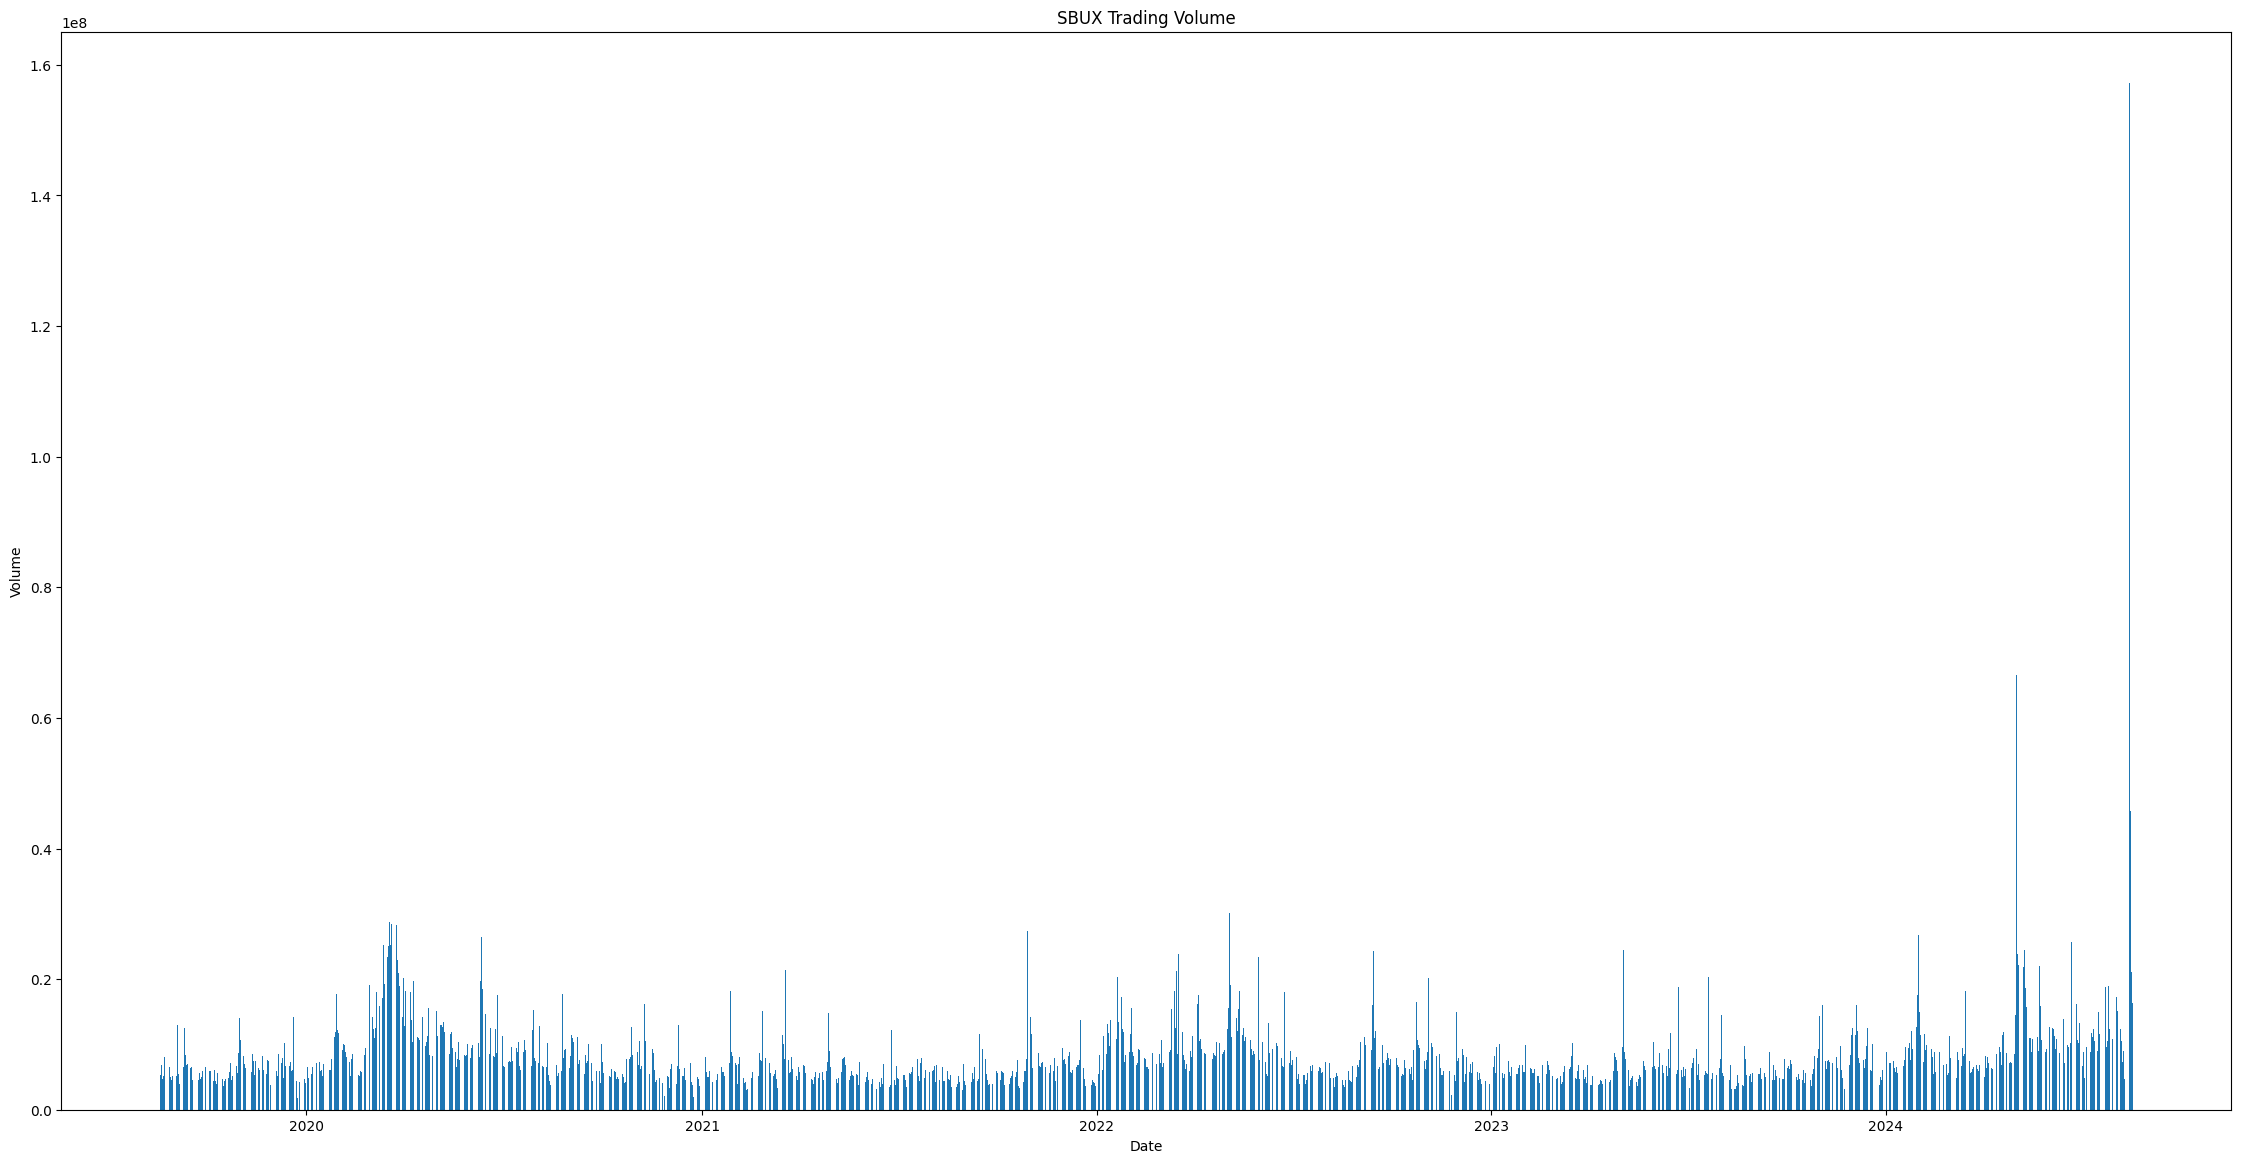

In [17]:
plt.figure(figsize=(28, 14))
plt.bar(df.index, df['Volume'])
plt.title('SBUX Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

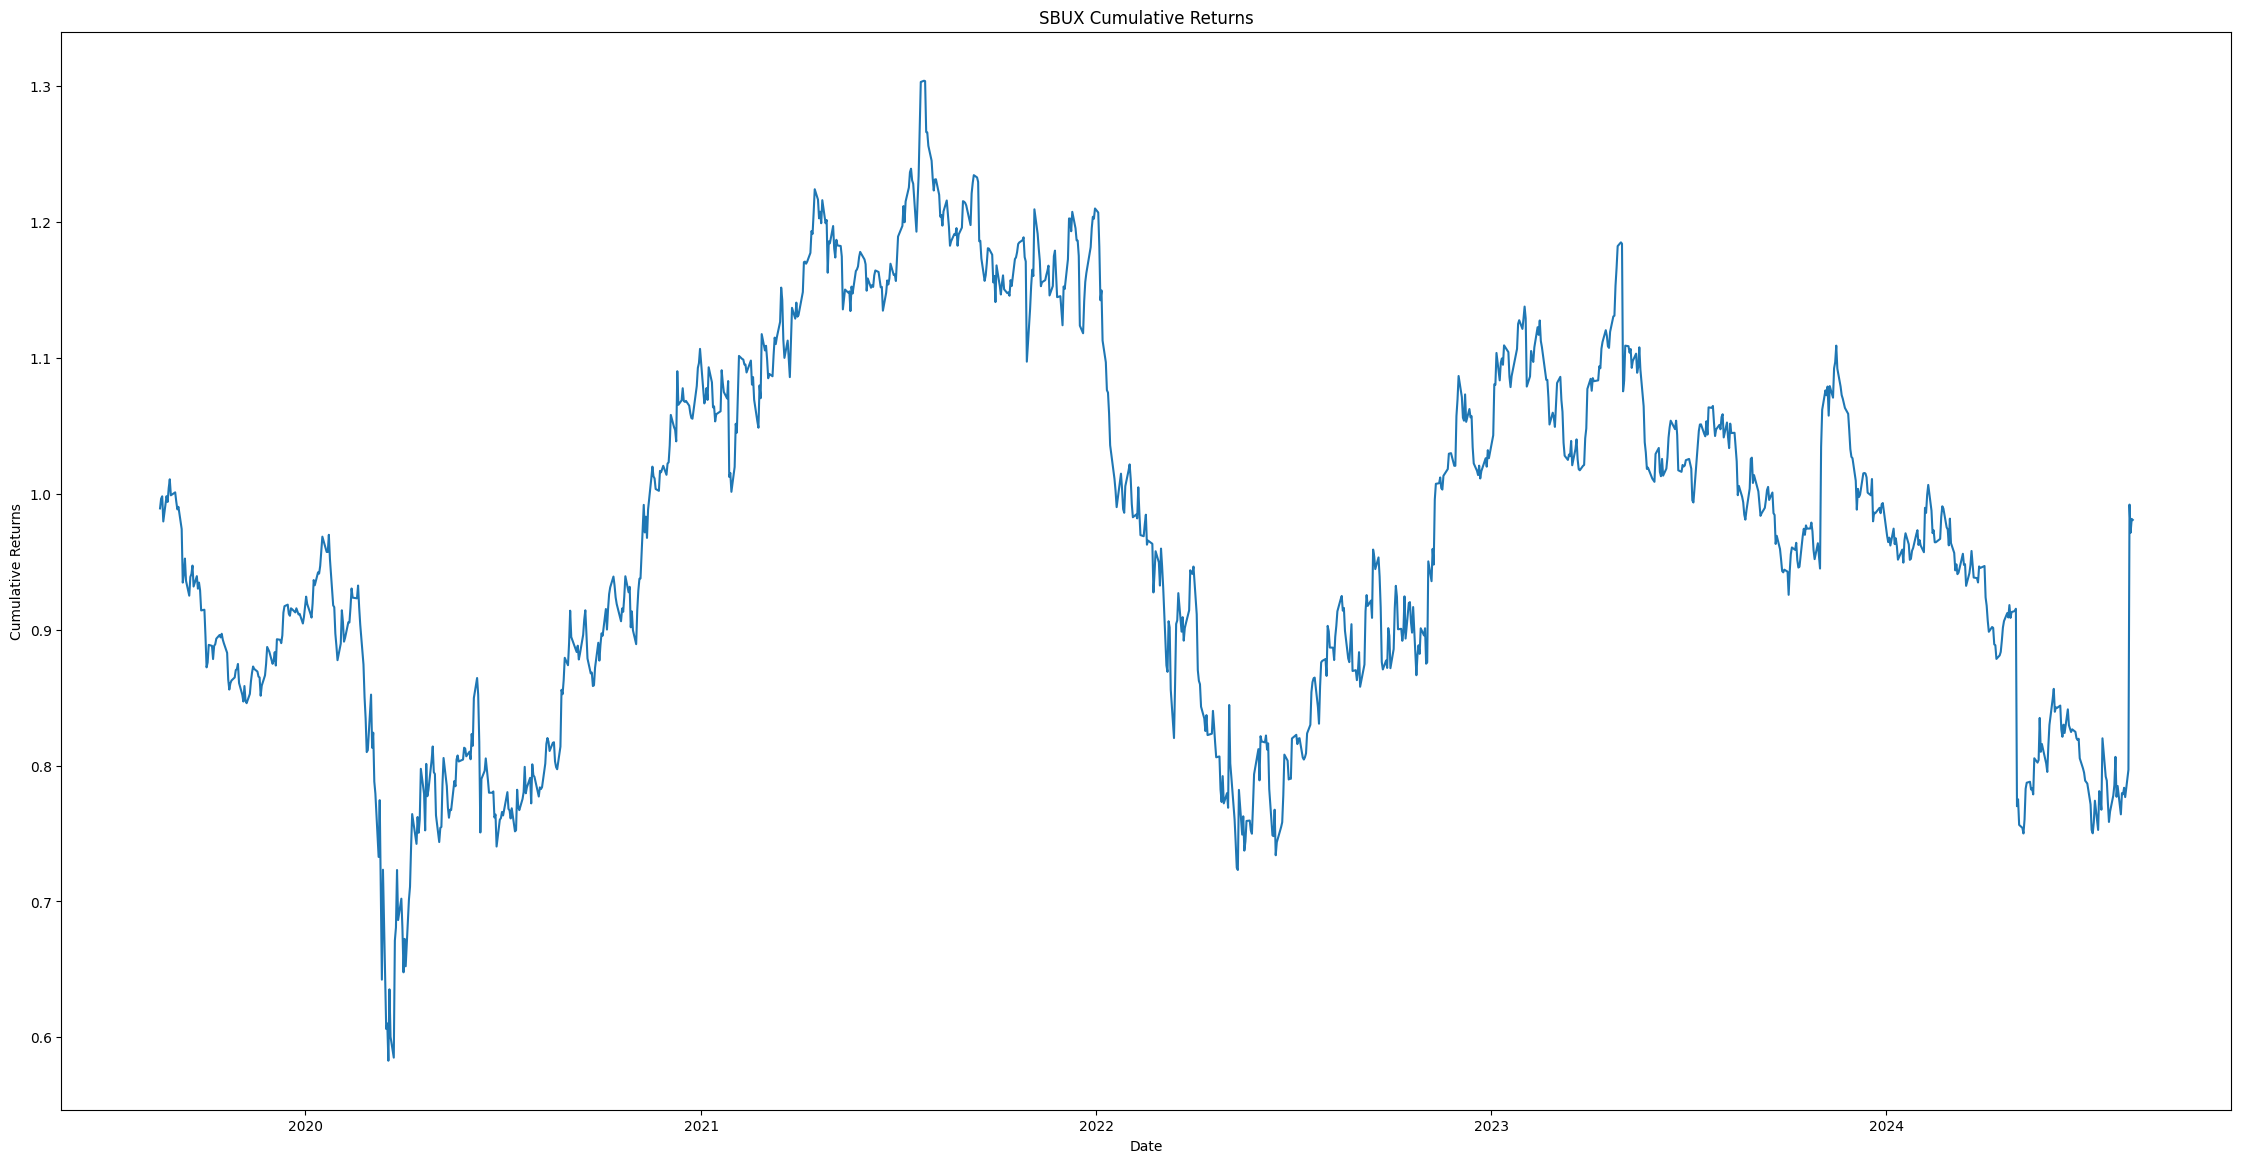

In [19]:
plt.figure(figsize=(28, 14))
plt.plot(df.index, df['Cumulative_Returns'])
plt.title('SBUX Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


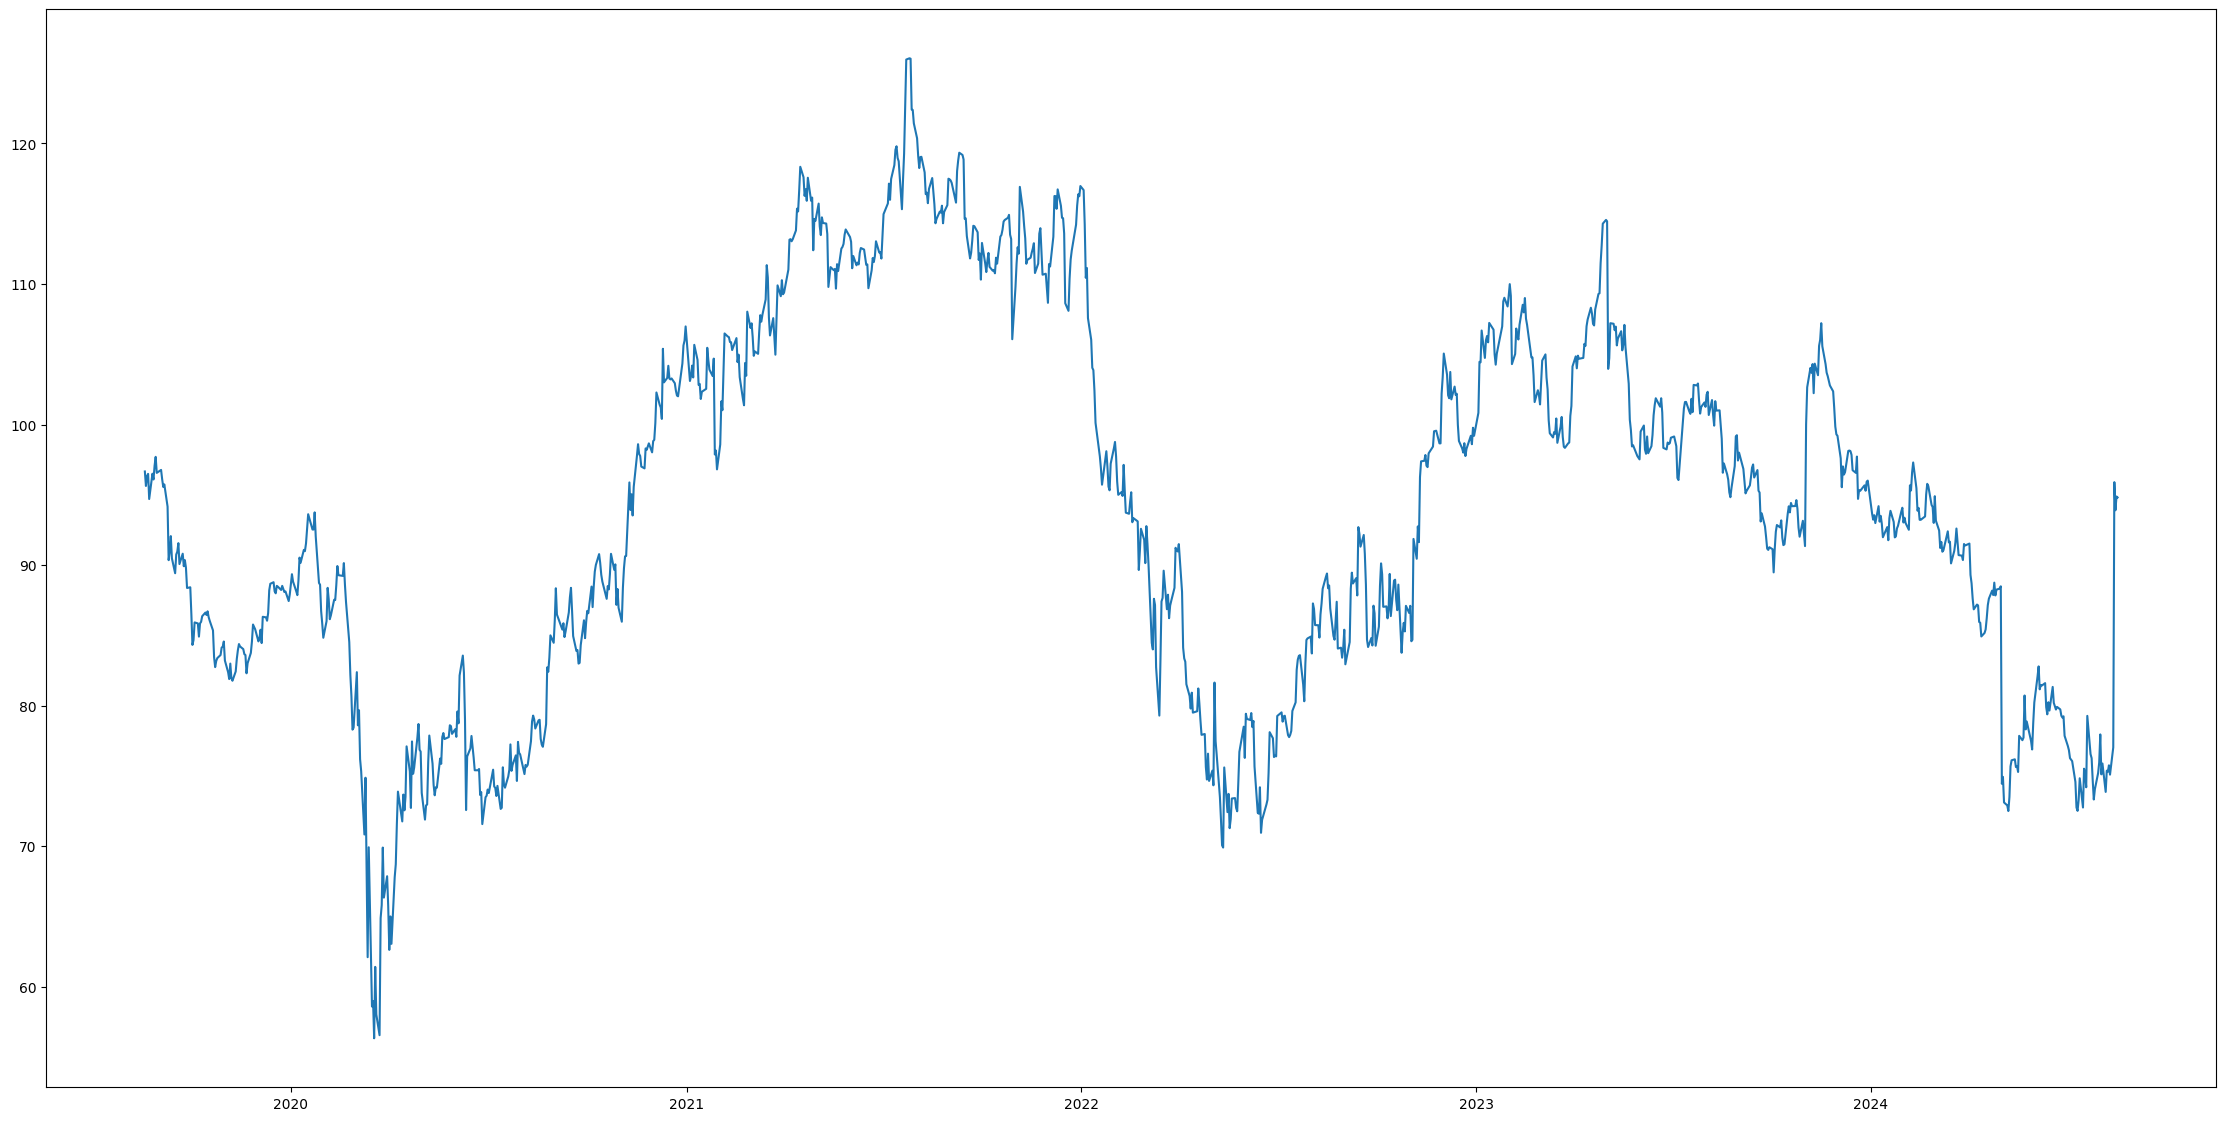

In [20]:
plt.figure(figsize=(28, 14))
plt.plot(df.index, df['Close'])


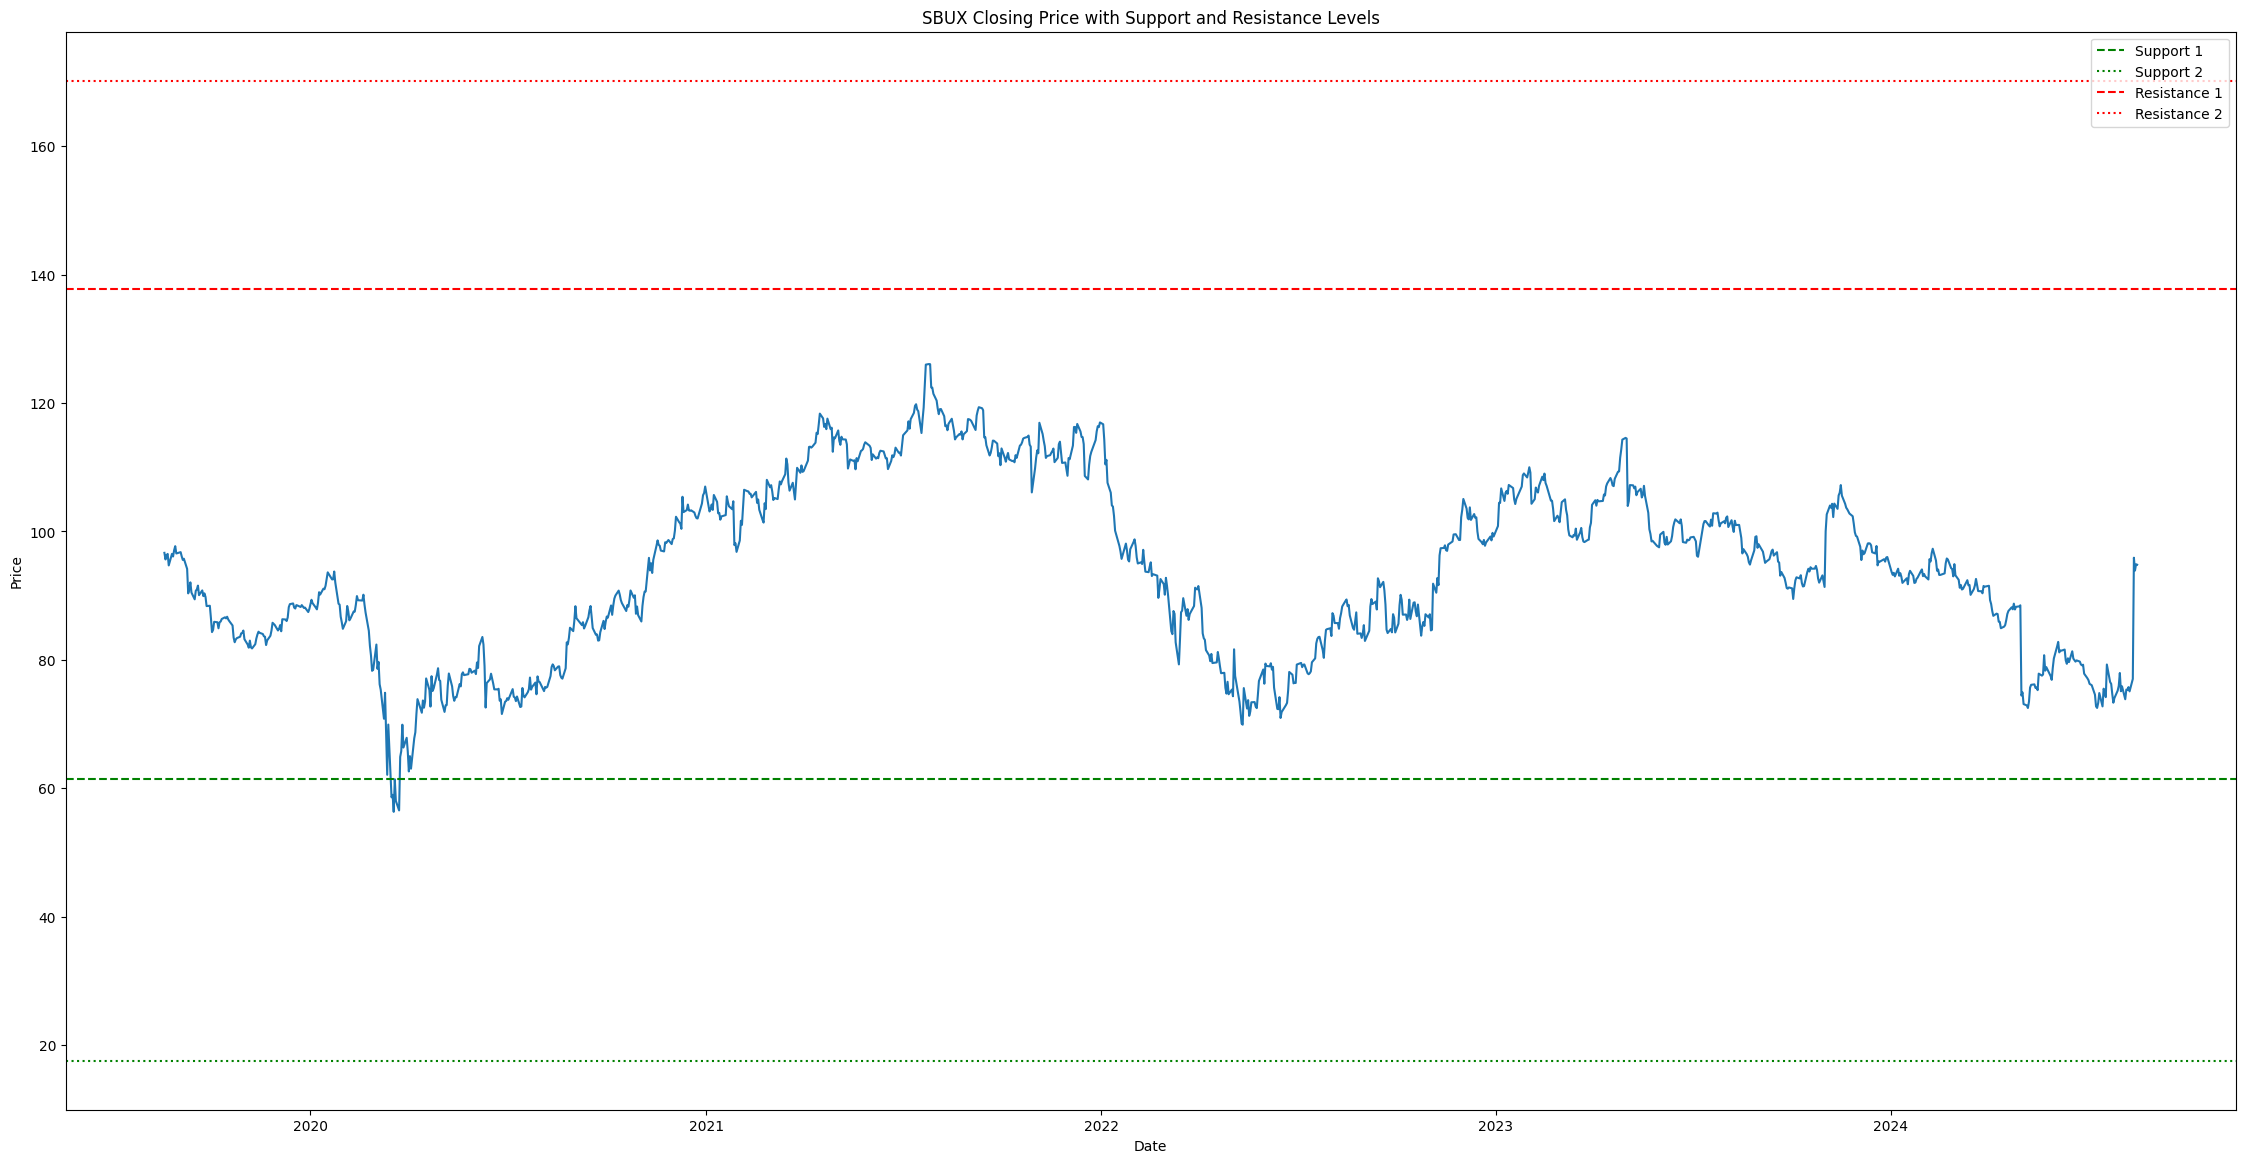

In [29]:
pivot = df['Close'].mean()
s1 = 2 * pivot - df['High'].max()
s2 = pivot - (df['High'].max() - df['Low'].min())
r1 = 2 * pivot - df['Low'].min()
r2 = pivot + (df['High'].max() - df['Low'].min())

plot_support_resistance(df)

In [34]:

# plot_closing_price(df)
# plot_returns(df)
# plot_volatility(df)
# plot_volume(df)
# plot_cumulative_returns(df)
# plot_support_resistance(df)

In [30]:
print("Max Drawdown:")
print(max_drawdown)

Max Drawdown:
-0.4455021171743952
